In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid

In [2]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [3]:
# area1
# polygon = "POLYGON ((143.32317350376297 -37.496296386368165, 143.32180000642074 -37.70330610816869, 143.59543478539388 -37.70317028876007, 143.5968081449812 -37.49575155973978, 143.32317350376297 -37.496296386368165))"
# area 3
# polygon = "POLYGON ((144.0229424345357 -37.55299953752239, 144.02019905996406 -37.97282887730929, 144.6632499098556 -37.972670022747636, 144.66240633494579 -37.552454710108975, 144.0229424345357 -37.55299953752239))"
# large area
polygon = "POLYGON ((142.2509765625 -36.564271808625506, 142.2784423828125 -37.837462426016096, 144.55810546875 -37.837462426016096, 144.5306396484375 -36.55544720555245, 142.2509765625 -36.564271808625506))"
array, classes = rlu.read_land_use(da_shapefile="../SDM324649_full/ll_gda94/sde_shape/whole/VIC/CATCHMENTS/layer/landuse_2014.shp",
                  resolution=(8562, 5999),
                  area_filter=polygon,
                  buffer=-0.0001,
                  processes=12)

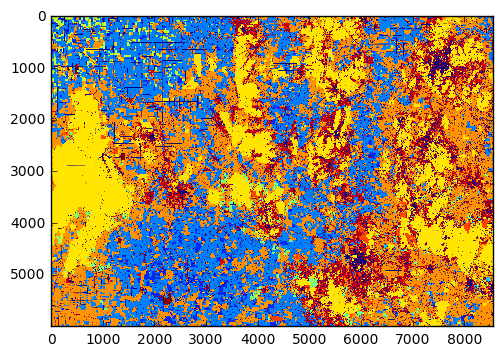

In [ ]:
plt.imshow(array)

In [ ]:
train = rid.old_data_preprocess_workflow(image_dir='../large_area/2014/images/',
                                         interpolate_processes=6,
                                         mask_dir='../large_area/2014/masks/', 
                                         table_dir='../large_area/2014/tables/LC8_SR.csv', 
                                         new_table_dir='../large_area/2015/tables/LC8_SR.csv', 
                                         shelve_root_dir='../models/large_area/shelves/', 
                                         labels=array, 
                                         processes=12, 
                                         max_days_apart=30, 
                                         step=500000)

reading data...
reading new timestamps...
interpolating images...
storing sets...
combining sets...


Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7f341d898f60>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.5/shelve.py", line 162, in __del__
    self.close()
  File "/home/ubuntu/anaconda3/lib/python3.5/shelve.py", line 144, in close
    self.sync()
  File "/home/ubuntu/anaconda3/lib/python3.5/shelve.py", line 172, in sync
    self.dict.sync()
  File "/home/ubuntu/anaconda3/lib/python3.5/dbm/dumb.py", line 124, in _commit
    self._chmod(self._dirfile)
  File "/home/ubuntu/anaconda3/lib/python3.5/dbm/dumb.py", line 270, in _chmod
    self._os.chmod(file, self._mode)
FileNotFoundError: [Errno 2] No such file or directory: '../models/large_area/shelves/old/pixels.dir'
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7f34b4737e48>>
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.5/shelve.py", line 162, in __del__
    self.close()
  File "/home/u

try to recover label map

In [6]:
list(train.keys())

['1', '3', '0', '2']

In [7]:
train['0'].shape

(250000, 121)

In [8]:
labels_set = [train[str(i)][:, -1].astype(int) for i in range(4)]

In [9]:
labels = np.concatenate(labels_set, axis=0)

In [10]:
labels.shape

(994406,)

In [11]:
head = rid.generate_coordinate_columns(973, 1022)

In [12]:
973*1022

994406

In [13]:
df = pd.DataFrame(np.concatenate([head, labels.reshape(len(labels), 1)], axis=1))

In [14]:
cls_map = df.pivot(index=0, columns=1, values=2)

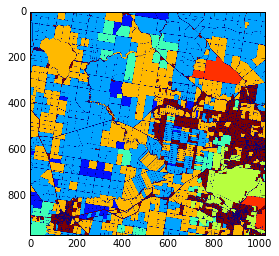

In [15]:
plt.imshow(cls_map)